# ALY 6080 - Integrated Experiential Learning 
# Group 5 

## ML Models - New Data(All Task Data)

### Goup Members: Zhichao Xie, Sayli Bahekar, Emily (Zhaohui) Fan, Haoyun Chen, Gloria Ramirez
### Instructor: Prof. Shanu Sushmita
### Northeastern University CPS Analytics
#### Created on Dec 08, 2021

## Content
1. Data extraction
2. Data Exploration Analysis & Data Cleaning
3. Data Pre Processing
    * Feature Engineering
    * One Hot Encoding
    * Train Test Split
4. Data Modeling & Evaluation
    * Decision Tree
    * K-Nearest Neighbors (KNN)
    * Support Vector Machine (SVM)
5. K-fold
6. Model Selection(Metric)

## 1. Data extraction  (All Task Data)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Import data Task Form
Tasks = pd.read_excel('/Users/Sayli/Documents/Masters/ALY 6080/Dataset/All Tasks Data.xlsx', sheet_name="Sheet1")

In [3]:
#Table preview
Tasks.head(10)

,External ID,Title,Sprint Start Date,End Date,Task Type,Project,Assigned to,Assigned to Developer,Total Hours,Hours Spent,...,Delivery Partner,Description,Ending Date,Hours Open,Initially Planned Hours,LOC-D,LOE-C,LOE-Q,Priority,Sprint
0,__export__.project_task_5017_e26a0a93,Quote View and Printed View aren't the same.,2021-09-20,2021-09-26,Development,Zuma: Odoo Implementation Phase 1 (P111),Fahad Hussain Malik,Raheel Aslam,3.08,3.08,...,Silverdale Technology LLC,"<p><span style='font-family: Roboto, ""Odoo Uni...",2021-09-30 02:25:08,729,11.000000,7.0,2.0,2.0,Important,Sprint 2139
1,__export__.project_task_4668_2132a98f,WildLeaf Deploy To Deployment + Production(2135),2021-08-23,2021-08-29,Deployment,Wild Leaf: Help (P22),Mir Muhammad Muzammil,False,0.00,0.00,...,Silverdale Technology LLC,"<p><font style=""background-color: rgb(200, 8, ...",2021-08-30 14:31:01,1376,0.000000,0.0,0.0,0.0,Important,Sprint 2135
2,__export__.project_task_4615_92c814c2,NMS Export File Name Date Issue,2021-08-16,2021-08-22,Bug Fix,Cellpoint: Odoo for Boost Files (P165),Farman Ahmad Cheema,Raheel Aslam,0.50,0.50,...,Silverdale Technology LLC,<p>The date issue is back. <br><br>The date as...,2021-08-20 23:58:47,1582,0.000000,0.0,0.0,0.0,Important,Sprint 2134
3,__export__.project_task_3811_375aea62,Brand Strategy: Recruitment Intro,2021-05-24,2021-05-30,Development,PWX: HR (P61),Muhammad Afzaal,Raheel Aslam,3.42,3.42,...,Silverdale Technology LLC,<p><b>This task will</b>: Modify an existing M...,2021-06-05 02:25:55,3719,6.000000,0.0,0.0,0.0,Important,Sprint 2122
4,__export__.project_task_3592_14b36f6e,Create a video for Dashboard activities,NaT,NaT,Configuration,Silverdale: Help (P12),Muhammad Afzaal,Muhammad Zubair,0.00,0.00,...,Silverdale Technology LLC,<p><br></p>,2021-05-20 20:04:40,4051,0.000000,0.0,0.0,0.0,Important,NaN
5,__export__.project_task_3580_f38d1800,Personality: finish line2,2021-05-10,2021-05-16,Development,PWX: Survey (P70),Muhammad Afzaal,Raheel Aslam,5.17,5.17,...,Silverdale Technology LLC,<p><i>see linked tasks for related tasks.</i><...,2021-05-14 02:26:18,4082,6.000000,0.0,0.0,0.0,Important,Sprint 2120
6,__export__.project_task_3368_42f01262,Automatically change Sales Order quantities ba...,2021-08-30,2021-09-05,Development,Wild Leaf: Consignment and Sales Improvements ...,Abdul Hameed,Muhammad Bilal,105.92,105.92,...,Silverdale Technology LLC,<p>This will be part of a consignment automati...,2021-09-15 02:25:22,4441,106.000000,106.0,0.0,0.0,Important,Sprint 2136
7,__export__.project_task_3352_2b81901d,VAT on invoice not reflecting correctly,NaT,NaT,Bug Fix,MMH Dr. Clark: Help (P106),Jeff Gross,Muhammad Bilal,20.42,20.42,...,Silverdale Technology LLC,<p>Following is the scenario to figure out the...,2021-06-30 02:25:39,4561,5.333333,0.0,0.0,0.0,Important,NaN
8,__export__.project_task_3301_7a833859,Deployment 06/04/2021: Continuant,2021-04-12,2021-04-18,Configuration,Continuant: AV Warehouse (P34),Jeff Gross,Wajahat Ali,1.50,1.50,...,Silverdale Technology LLC,<p><br></p>,2021-04-06 23:31:28,4758,0.000000,0.0,0.0,0.0,Important,Sprint 2116
9,__export__.project_task_3282_95ce833b,"Add a ""Print Pack Labels"" button to Transfers ...",2021-04-05,2021-04-11,Development,Wild Leaf: Help (P22),Jeff Gross,Aleem khan,6.67,6.67,...,Silverdale Technology LLC,"<p><span style='font-family: Roboto, ""Odoo Uni...",2021-04-17 23:29:53,4881,2.500000,0.0,0.0,0.0,Important,Sprint 2115


In [4]:
Tasks.shape

(3969, 44)

In [5]:
# Type of Data Columns
Tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3969 entries, 0 to 3968
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   External ID              3969 non-null   object        
 1   Title                    3969 non-null   object        
 2   Sprint Start Date        3082 non-null   datetime64[ns]
 3   End Date                 3082 non-null   datetime64[ns]
 4   Task Type                3969 non-null   object        
 5   Project                  3969 non-null   object        
 6   Assigned to              3969 non-null   object        
 7   Assigned to Developer    3969 non-null   object        
 8   Total Hours              3969 non-null   float64       
 9   Hours Spent              3969 non-null   float64       
 10  Remaining Hours          3969 non-null   float64       
 11  Progress                 3969 non-null   float64       
 12  Deadline                 1018 non-

### Data Cleaning   (Model Features )

In [6]:
# Model Features 
df = Tasks[['Task Type','Task Difficulty','Assigned to','Assigned to Developer','Client','Remaining Hours', 'Billable','Project Manager','Delivery Team','Priority']]

In [7]:
# Data Frame Preview
df.head()

,Task Type,Task Difficulty,Assigned to,Assigned to Developer,Client,Remaining Hours,Billable,Project Manager,Delivery Team,Priority
0,Development,0,Fahad Hussain Malik,Raheel Aslam,Zuma Sales LLC,7.92,True,Asfand Yaar,Executive / Delivery / Alpha,Important
1,Deployment,0,Mir Muhammad Muzammil,False,Wild Leaf Beverage,0.00,True,Abdul Hameed,Executive / Delivery / Alpha,Important
2,Bug Fix,0,Farman Ahmad Cheema,Raheel Aslam,Cellpoint Corporation,-0.50,True,Farman Ahmad Cheema,Executive / Delivery / Bravo,Important
3,Development,3,Muhammad Afzaal,Raheel Aslam,EquityTeam,2.58,False,Naseeb Razaq,Executive / Delivery / Alpha,Important
4,Configuration,0,Muhammad Afzaal,Muhammad Zubair,Silverdale Technology LLC,0.00,False,Muhammad Zubair,Executive / Mechanisms,Important


In [8]:
# Type of Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3969 entries, 0 to 3968
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Task Type              3969 non-null   object 
 1   Task Difficulty        3969 non-null   int64  
 2   Assigned to            3969 non-null   object 
 3   Assigned to Developer  3969 non-null   object 
 4   Client                 3969 non-null   object 
 5   Remaining Hours        3969 non-null   float64
 6   Billable               3969 non-null   bool   
 7   Project Manager        3969 non-null   object 
 8   Delivery Team          3969 non-null   object 
 9   Priority               3969 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 283.1+ KB


In [9]:
#check missing value
df.isnull().sum()

Task Type                0
Task Difficulty          0
Assigned to              0
Assigned to Developer    0
Client                   0
Remaining Hours          0
Billable                 0
Project Manager          0
Delivery Team            0
Priority                 0
dtype: int64

In [10]:
# Assign 0 to missing values in Task Difficulty
df['Task Difficulty'] = df['Task Difficulty'].fillna(0)

<ipython-input-10-c13a21d1c78f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Task Difficulty'] = df['Task Difficulty'].fillna(0)


In [11]:
# Drop the observations with missing values
df_no_missing = df.dropna()

In [12]:
#check missing value
df_no_missing.isnull().sum()

Task Type                0
Task Difficulty          0
Assigned to              0
Assigned to Developer    0
Client                   0
Remaining Hours          0
Billable                 0
Project Manager          0
Delivery Team            0
Priority                 0
dtype: int64

In [13]:
df_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3969 entries, 0 to 3968
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Task Type              3969 non-null   object 
 1   Task Difficulty        3969 non-null   int64  
 2   Assigned to            3969 non-null   object 
 3   Assigned to Developer  3969 non-null   object 
 4   Client                 3969 non-null   object 
 5   Remaining Hours        3969 non-null   float64
 6   Billable               3969 non-null   bool   
 7   Project Manager        3969 non-null   object 
 8   Delivery Team          3969 non-null   object 
 9   Priority               3969 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 314.0+ KB


In [14]:
#summary statistics
df_no_missing.describe()

,Task Difficulty,Remaining Hours
count,3969.000000,3969.000000
mean,0.251953,-2.272839
std,0.757031,32.335380
min,0.000000,-1061.580000
25%,0.000000,-0.670000
50%,0.000000,0.000000
75%,0.000000,0.500000
max,4.000000,53.080000


### 3. Data Processing

In [15]:
#  Set Features for Model
X = df_no_missing.drop('Remaining Hours', axis = 1).copy()
X.head()

,Task Type,Task Difficulty,Assigned to,Assigned to Developer,Client,Billable,Project Manager,Delivery Team,Priority
0,Development,0,Fahad Hussain Malik,Raheel Aslam,Zuma Sales LLC,True,Asfand Yaar,Executive / Delivery / Alpha,Important
1,Deployment,0,Mir Muhammad Muzammil,False,Wild Leaf Beverage,True,Abdul Hameed,Executive / Delivery / Alpha,Important
2,Bug Fix,0,Farman Ahmad Cheema,Raheel Aslam,Cellpoint Corporation,True,Farman Ahmad Cheema,Executive / Delivery / Bravo,Important
3,Development,3,Muhammad Afzaal,Raheel Aslam,EquityTeam,False,Naseeb Razaq,Executive / Delivery / Alpha,Important
4,Configuration,0,Muhammad Afzaal,Muhammad Zubair,Silverdale Technology LLC,False,Muhammad Zubair,Executive / Mechanisms,Important


In [16]:
# Target Variable for Model
Y = df_no_missing['Remaining Hours'].copy()
Y.head()

0    7.92
1    0.00
2   -0.50
3    2.58
4    0.00
Name: Remaining Hours, dtype: float64

### Feature Engineering


#### In order to build classification models, if ['Remaining Hours'] less or equal to 0 then assigen to complete(0), otherwise incomplete(1) 

In [17]:
# Recoding Target Variable
Y_complete_index = Y <= 0
Y[Y_complete_index] = 1
Y[-Y_complete_index] = 0
Y.unique()

array([0., 1.])

In [18]:
Y[-Y_complete_index].count()

1440

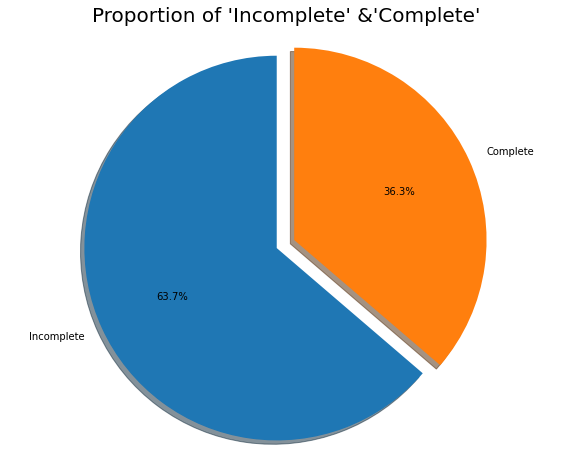

In [19]:
# Visualize target variable
labels = 'Incomplete', 'Complete'
sizes = [Y[Y_complete_index].count(), Y[-Y_complete_index].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of 'Incomplete' &'Complete'", size = 20)
plt.show()

In [20]:
# One Hot Encoding
X_encoded = pd.get_dummies(X, columns = ['Task Type','Task Difficulty','Assigned to','Assigned to Developer','Client','Billable','Project Manager','Delivery Team','Priority'])
X_encoded.head()

,Task Type_False,Task Type_Bug Fix,Task Type_Client Meetings,Task Type_Configuration,Task Type_Creative,Task Type_Demo to the client,Task Type_Deployment,Task Type_Development,Task Type_Documentation,Task Type_Functionality Test,...,Project Manager_Naseeb Razaq,Project Manager_Nasik Tahir,Project Manager_Nick Foy,Project Manager_Shehroz Faiq,Delivery Team_False,Delivery Team_Executive / Delivery / Alpha,Delivery Team_Executive / Delivery / Bravo,Delivery Team_Executive / Mechanisms,Priority_Important,Priority_Normal
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [21]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.25,random_state = 42)

### 4. Data Modeling & Evaluation

##### 1. Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 6, random_state=101)
tree.fit(x_train, y_train)
predictions = tree.predict(x_train)


In [35]:
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import roc_auc_score

print(confusion_matrix(y_train, predictions))
print("\n")
print(classification_report(y_train, predictions))
print("\n")
print("roc_auc_score:",roc_auc_score(y_train,predictions))

[[ 471  600]
 [ 169 1736]]


              precision    recall  f1-score   support

         0.0       0.74      0.44      0.55      1071
         1.0       0.74      0.91      0.82      1905

    accuracy                           0.74      2976
   macro avg       0.74      0.68      0.68      2976
weighted avg       0.74      0.74      0.72      2976



roc_auc_score: 0.6755309998014954


In [36]:
predictions = tree.predict(x_test)
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))
print("\n")
print("roc_auc_score:",roc_auc_score(y_test,predictions))

[[151 218]
 [ 78 546]]


              precision    recall  f1-score   support

         0.0       0.66      0.41      0.51       369
         1.0       0.71      0.88      0.79       624

    accuracy                           0.70       993
   macro avg       0.69      0.64      0.65       993
weighted avg       0.69      0.70      0.68       993



roc_auc_score: 0.6421070460704608


In [37]:
# Cross Validation for Decision Tree
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, x_train, y_train, cv=10, scoring = "f1")
print("Recall of 10-fold cross validation:", scores)
print("Average Accuracy of 10-fold cross validation:", scores.mean().round(2))

Recall of 10-fold cross validation: [0.82973621 0.8        0.79545455 0.80481928 0.79342723 0.8071066
 0.78672986 0.81944444 0.82269504 0.82678984]
Average Accuracy of 10-fold cross validation: 0.81


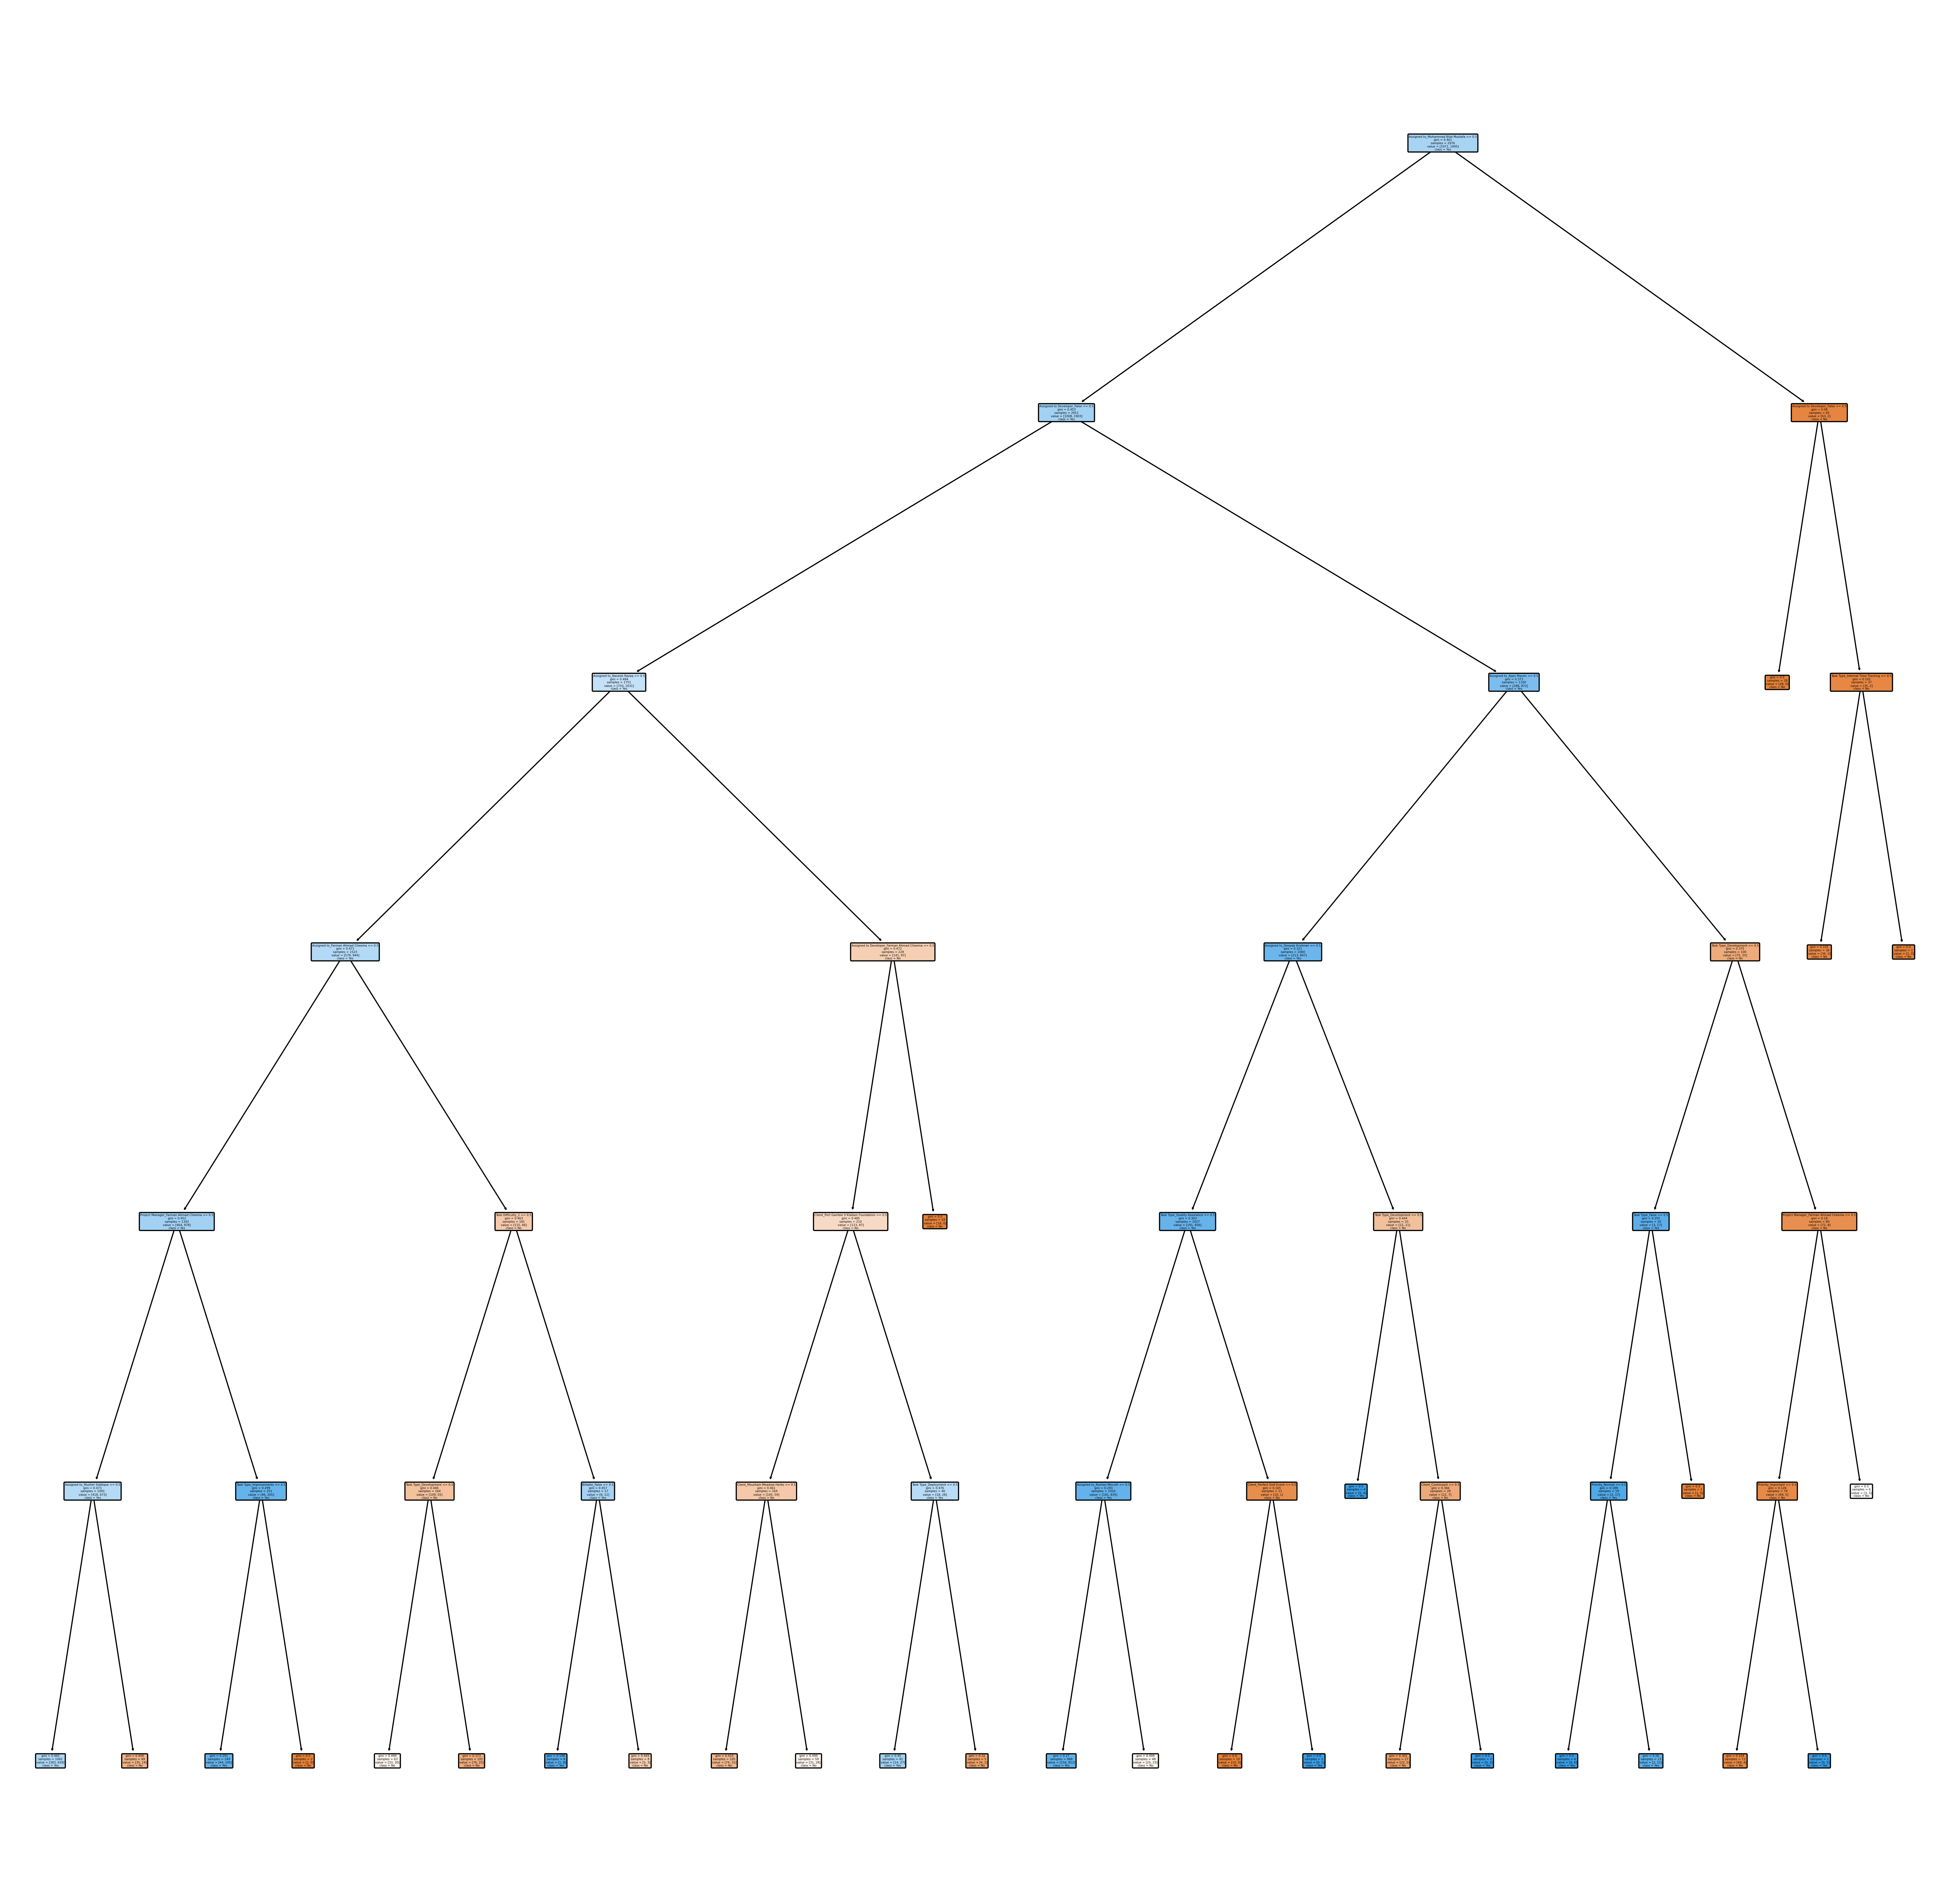

In [38]:
from sklearn.tree import plot_tree
plt.figure(figsize = (30, 30), dpi = 300)
plot_tree(tree.fit(x_train, y_train), filled = True, rounded = True, class_names = ['No', 'Yes'], feature_names = X_encoded.columns);

##### 2. K-Nearest Neighbors 

In [39]:
from sklearn.neighbors import KNeighborsClassifier
>>> knn_model = KNeighborsClassifier(n_neighbors=3)

In [40]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(x_train)
print(confusion_matrix(y_train, train_preds))
print("\n")
print(classification_report(y_train, train_preds))
print("\n")
print("roc_auc_score:",roc_auc_score(y_train,train_preds))

[[ 777  294]
 [ 211 1694]]


              precision    recall  f1-score   support

         0.0       0.79      0.73      0.75      1071
         1.0       0.85      0.89      0.87      1905

    accuracy                           0.83      2976
   macro avg       0.82      0.81      0.81      2976
weighted avg       0.83      0.83      0.83      2976



roc_auc_score: 0.8073645206113942


In [42]:
test_preds = knn_model.predict(x_test)
print(confusion_matrix(y_test, test_preds))
print("\n")
print(classification_report(y_test, test_preds))
print("\n")
print("roc_auc_score:",roc_auc_score(y_test,test_preds))

[[220 149]
 [111 513]]


              precision    recall  f1-score   support

         0.0       0.66      0.60      0.63       369
         1.0       0.77      0.82      0.80       624

    accuracy                           0.74       993
   macro avg       0.72      0.71      0.71       993
weighted avg       0.73      0.74      0.73       993



roc_auc_score: 0.7091606733375027


In [43]:
# Cross Validation for KNN
scores = cross_val_score(knn_model, x_train, y_train, cv=10, scoring = "f1")
print("Recall of 10-fold cross validation:", scores)
print("Average Accuracy of 10-fold cross validation:", scores.mean().round(2))

Recall of 10-fold cross validation: [0.825      0.77368421 0.80882353 0.79575597 0.78712871 0.84263959
 0.76683938 0.825      0.80211082 0.77694236]
Average Accuracy of 10-fold cross validation: 0.8


##### 3. Support Vector Machine

In [44]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(x_train, y_train)


sv_predictions = svc.predict(x_train)

# Model Evaluation Metric: Recall & f1_score
print(classification_report(y_train,sv_predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.61      0.69      1071
         1.0       0.81      0.91      0.85      1905

    accuracy                           0.80      2976
   macro avg       0.80      0.76      0.77      2976
weighted avg       0.80      0.80      0.79      2976



In [45]:
sv_predictions = svc.predict(x_test)

# Model Evaluation Metric: Recall & f1_score
print(classification_report(y_test,sv_predictions))



              precision    recall  f1-score   support

         0.0       0.70      0.59      0.64       369
         1.0       0.78      0.85      0.81       624

    accuracy                           0.75       993
   macro avg       0.74      0.72      0.73       993
weighted avg       0.75      0.75      0.75       993



In [46]:
# Cross Validation for KNN
scores = cross_val_score(svc, x_train, y_train, cv=10, scoring = "f1")
print("Recall of 10-fold cross validation:", scores)
print("Average Accuracy of 10-fold cross validation:", scores.mean().round(2))

Recall of 10-fold cross validation: [0.83211679 0.81296758 0.80193237 0.83084577 0.80963855 0.84863524
 0.81094527 0.84079602 0.82619647 0.83173077]
Average Accuracy of 10-fold cross validation: 0.82
